https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter07/Dataset/heart.csv')

In [101]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [102]:
df.rename(index = str, columns = {
    'cp' : 'chest_pain',
    'trestbps' : 'rest_bp', 
    'fbs' : 'fast_bld_sugar', 
    'restecg' : 'rest_ecg', 
    'thalach' : 'max_hr', 
    'exang' : 'ex_angina', 
    'oldpeak' : 'st_depr', 
    'ca' : 'colored_vessels',
    'thal' : 'thalassemia', 
}, inplace = True)


In [103]:
df.shape

(303, 14)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chest_pain       303 non-null    int64  
 3   rest_bp          303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fast_bld_sugar   303 non-null    int64  
 6   rest_ecg         303 non-null    int64  
 7   max_hr           303 non-null    int64  
 8   ex_angina        303 non-null    int64  
 9   st_depr          303 non-null    float64
 10  slope            303 non-null    int64  
 11  colored_vessels  303 non-null    int64  
 12  thalassemia      303 non-null    int64  
 13  target           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


In [105]:
df.isnull().sum()

age                0
sex                0
chest_pain         0
rest_bp            0
chol               0
fast_bld_sugar     0
rest_ecg           0
max_hr             0
ex_angina          0
st_depr            0
slope              0
colored_vessels    0
thalassemia        0
target             0
dtype: int64

## Method1 - Standard Deviation

In [106]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = statistics.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("Lower Limit: ",lower_limit)
    print("Upper Limit: ",upper_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

<AxesSubplot:xlabel='chol'>

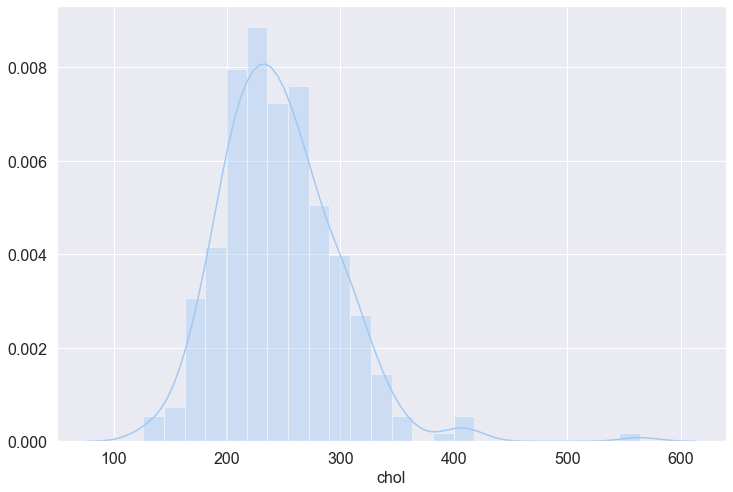

In [107]:
sns.distplot(df['chol'])

In [108]:
find_anomalies(df['chol'])

Lower Limit:  91.02857337126883
Upper Limit:  401.49947943401173


[417, 564, 407, 409]

In [16]:
df[df['chol'] > 400]

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


## Method2 - Box Plot

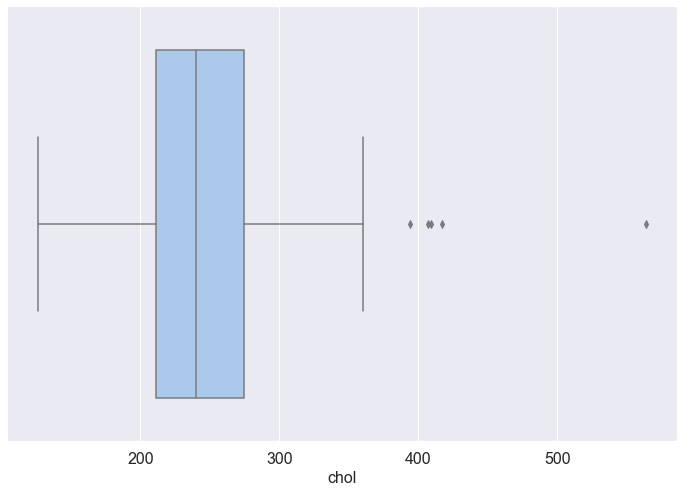

In [109]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

chol = sns.boxplot(df['chol'])
plt.show()

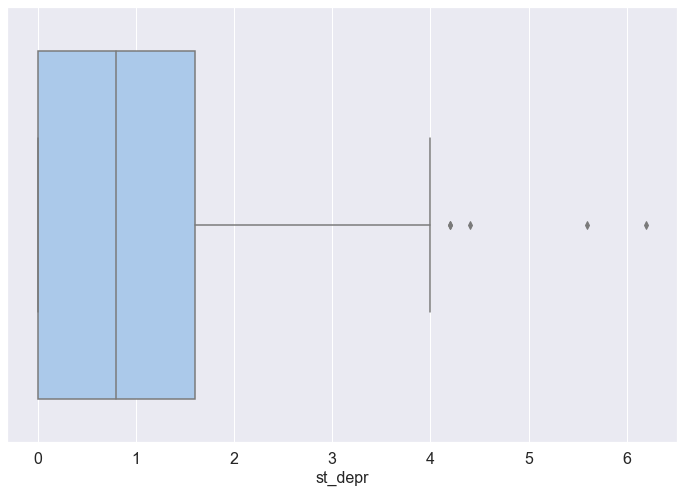

In [110]:
sd = sns.boxplot(df['st_depr'])
plt.show()

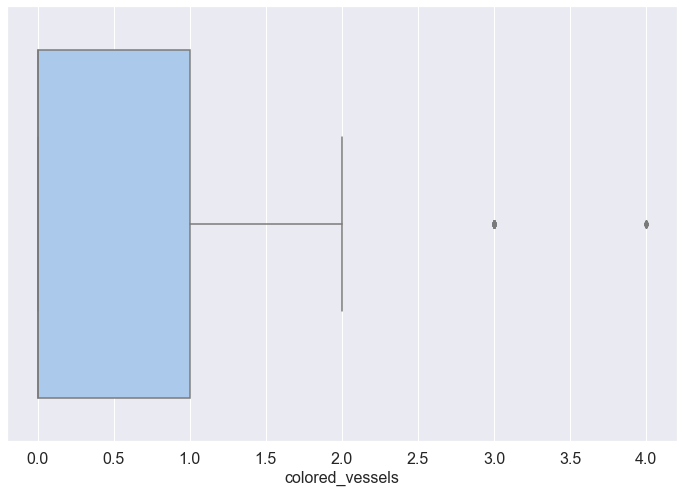

In [111]:
cv = sns.boxplot(df['colored_vessels'])
plt.show()

In [112]:
df[df['colored_vessels']>2]

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


## Normalization

y = (x – min) / (max – min)

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
df.head()

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.70833333 1.         1.         ... 0.         0.33333333 1.        ]
 [0.16666667 1.         0.66666667 ... 0.         0.66666667 1.        ]
 [0.25       0.         0.33333333 ... 0.         0.66666667 1.        ]
 ...
 [0.8125     1.         0.         ... 0.5        1.         0.        ]
 [0.58333333 1.         0.         ... 0.25       1.         0.        ]
 [0.58333333 0.         0.33333333 ... 0.25       0.66666667 0.        ]]


## Standardization

y = (x – mean) / standard_deviation

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled2 = scaler.fit_transform(df)
print(scaled2)

[[ 0.9521966   0.68100522  1.97312292 ... -0.71442887 -2.14887271
   0.91452919]
 [-1.91531289  0.68100522  1.00257707 ... -0.71442887 -0.51292188
   0.91452919]
 [-1.47415758 -1.46841752  0.03203122 ... -0.71442887 -0.51292188
   0.91452919]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  1.24459328  1.12302895
  -1.09345881]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.26508221  1.12302895
  -1.09345881]
 [ 0.29046364 -1.46841752  0.03203122 ...  0.26508221 -0.51292188
  -1.09345881]]


## Box-Cox Transformation

Box-Cox transformation is a statistical technique known to have remedial effects on highly skewed data. If λ is determined to be 2, then the distribution will be raised to a power of 2 — Y2. The exception to this rule is when the λ is 0 - log will be taken to the distribution — log(Y). Note that using a λ=1 does not do anything to the distribution. If the Box-Cox algorithm spits out λ=1, it probably means that your data is Gaussian-like or Gaussian enough to an extent that there is no need for transformation. 

https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#boxcox

In [118]:
from scipy import stats
import scipy

In [119]:
# let’s create a Skewed distribution
skewed_dist = stats.loggamma.rvs(5, size=10000) + 5


In [120]:
# let’s create a normal distribution
normal_dist = np.random.normal(0, 1, 10000)


- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

Skewness for the skewed distribution: -0.4462528700968671
Skewness for the normal distribution: -0.014388584718028796


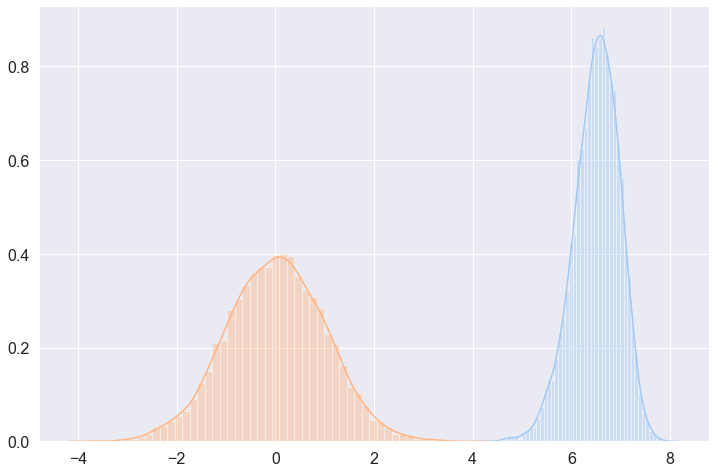

In [121]:
sns.distplot(skewed_dist)
print("Skewness for the skewed distribution:",scipy.stats.stats.skew(skewed_dist))
sns.distplot(normal_dist)
print("Skewness for the normal distribution:",scipy.stats.stats.skew(normal_dist))

Below are some common values for lambda

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

<AxesSubplot:>

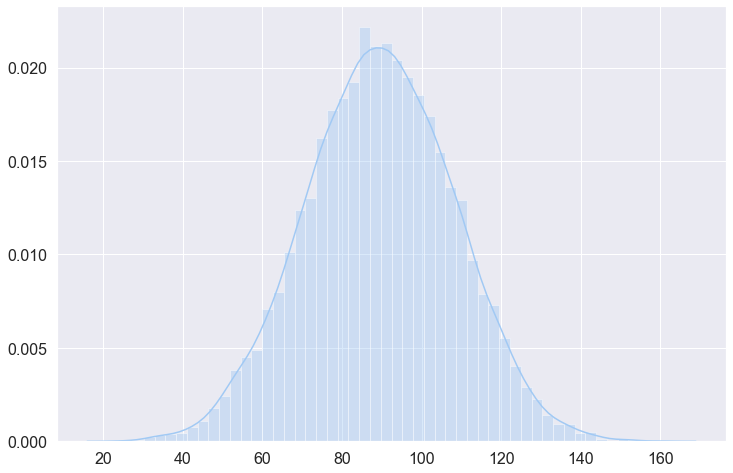

In [122]:
skewed_box_cox, lmda = stats.boxcox(skewed_dist)
sns.distplot(skewed_box_cox)

In [123]:
print("Skewness for the box-cox distribution:",scipy.stats.stats.skew(skewed_box_cox))

Skewness for the box-cox distribution: -0.008122287741704466


In [124]:
print(lmda)

2.9769680162246606


In [125]:
from scipy.special import inv_boxcox

# inverse transform
inv_sk = inv_boxcox(skewed_box_cox, lmda)

In [126]:
print("Skewness for the inverse box-cox distribution:",scipy.stats.stats.skew(inv_sk))

Skewness for the inverse box-cox distribution: -0.44625287009687287


The optimal value of the parameter λ is the one that results in the best approximation of a normal distribution. Note that the Box-Cox transformation fails if the data assumes negative values or zero. If this is the case, the Yeo-Johnson transformation can be used

In [127]:
from scipy.stats import yeojohnson

In [129]:
from sklearn.preprocessing import PowerTransformer

In [130]:
pt = PowerTransformer(method='box-cox')

In [134]:
pt = PowerTransformer(method='yeo-johnson')

In [135]:
df1 = df.copy()

In [136]:
data = df1.values[:, :-1]


In [137]:
data = pt.fit_transform(data)

/Users/babukp/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


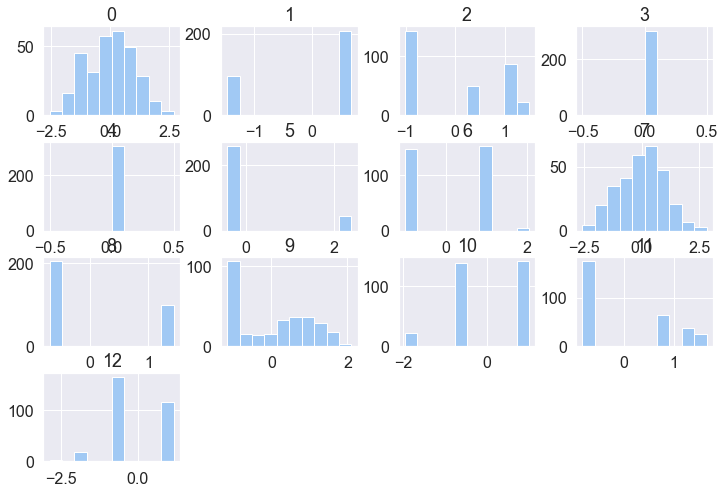

In [138]:
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# histograms of the variables
dataset.hist()
plt.show()

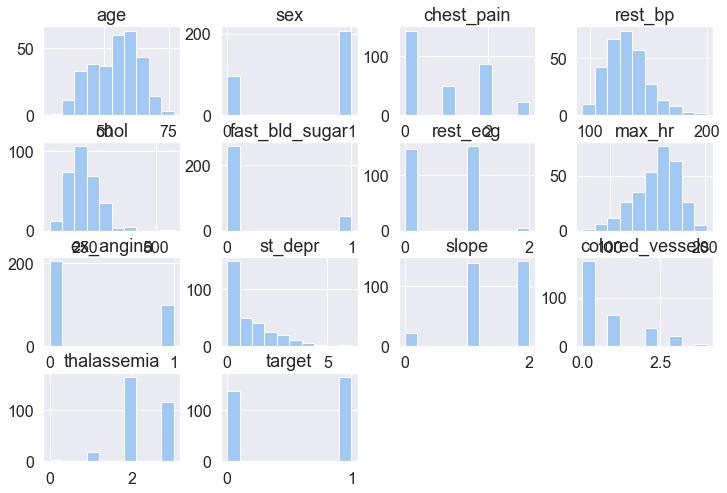

In [97]:
# histograms of the variables
df.hist()
plt.show()